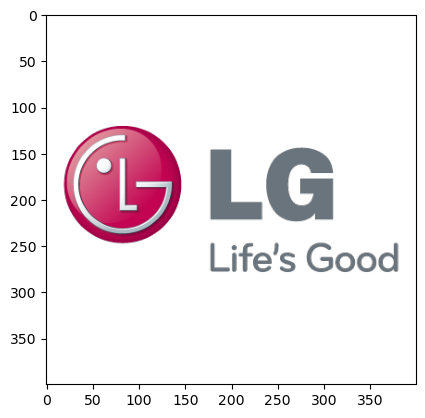

In [1]:
from skimage import io
import os
import matplotlib.pyplot as plt
import torch

images = []

names = os.listdir('Logos')

for im in names:
    images.append(io.imread(f'Logos/{im}'))

plt.imshow(images[0])


In [2]:
labels = torch.randn((len(images),3),)
labels.abs_()
print(labels.shape)
labels = labels/4*10


print(
labels.int().max(),
labels.int().min()
)


torch.Size([1116, 3])
tensor(10, dtype=torch.int32) tensor(0, dtype=torch.int32)


In [3]:
from sklearn.model_selection import train_test_split
import numpy as np
import torch
print('123')
data_x = torch.tensor(images, dtype=torch.float32)

123


KeyboardInterrupt: 

ValueError: expected sequence of length 4 at dim 3 (got 3)

In [ ]:

data_x = torch.transpose(data_x, 1, 3)
print(data_x.shape)
data_y = torch.tensor(labels, dtype=torch.float32)
print(data_y.shape)

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.25)

123


ValueError: expected sequence of length 4 at dim 3 (got 3)

In [8]:
X_train

NameError: name 'X_train' is not defined

In [23]:
import numpy as np
import numpy.random
import os
from skimage import io
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from model.model2 import Simple 
from tqdm import tqdm
import pandas as pd

image_dir = 'Dataset_1'
img_size_x = 400
img_size_y = 400
img_count_chanel = 3

dataset = pd.read_csv('data/preprocess_data.csv')
images = []

for label in dataset['label']:
    images.append(io.imread(f'Dataset_1/{label}'))
# numpy.random.seed(42)

print(len(images))
print(len(dataset))
print(dataset)

data_x = torch.tensor(images, dtype=torch.float32)
data_x = torch.transpose(data_x, 1, 3)
print(data_x.shape)
data_y = torch.tensor(dataset[dataset.columns[1:]].values, dtype=torch.float32)
print(data_y.shape)

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.25)

net = Simple()
loss_fn = nn.L1Loss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

loss_list = []
step = 10

for epoch in tqdm(range(800)):
    loss_ar = 0
    optimizer.zero_grad()

    pred = net(X_train)

    loss = loss_fn(pred, y_train)
    loss.backward()
    optimizer.step()

net.eval()

46
46
      label  style  noice  place
0     1.jpg      3      6      4
1    10.jpg      3      4      6
2   100.jpg      5      6      6
3    11.jpg      4      6      5
4    12.jpg      6      1      7
5    13.jpg      6      2      7
6    14.jpg      5      2      5
7    15.jpg      6      2      8
8    16.jpg      2      4      3
9    17.jpg      7      2      8
10   18.jpg      7      2      7
11   19.jpg      3      6      4
12    2.jpg      6      5      7
13   20.jpg      7      2      7
14   21.jpg      6      1      7
15   22.jpg      5      2      7
16   23.jpg      5      2      7
17   24.jpg      8      5      7
18   25.jpg      6      4      5
19   26.jpg      7      3      9
20   27.jpg      6      2      6
21   28.jpg      4      6      5
22   29.jpg      6      3      7
23    3.jpg      7      2      8
24   30.jpg      6      1      7
25   31.jpg      4      2      5
26   32.jpg      3      5      3
27   33.jpg      4      8      4
28   34.jpg      6      3      5
29  

100%|██████████| 800/800 [00:26<00:00, 30.53it/s]


Simple(
  (sq): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=480000, out_features=3, bias=True)
  )
)

0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
torch.Size([12, 3])
torch.Size([12, 1, 3])
tensor(59370.2656)


/var/folders/rt/w8d8cnvx44ld5g59p4r5hvp00000gp/T/ipykernel_979/1108650868.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(F.l1_loss(torch.tensor(preds),y_test))
/var/folders/rt/w8d8cnvx44ld5g59p4r5hvp00000gp/T/ipykernel_979/1108650868.py:14: UserWarning: Using a target size (torch.Size([12, 3])) that is different to the input size (torch.Size([12, 1, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  print(F.l1_loss(torch.tensor(preds),y_test))


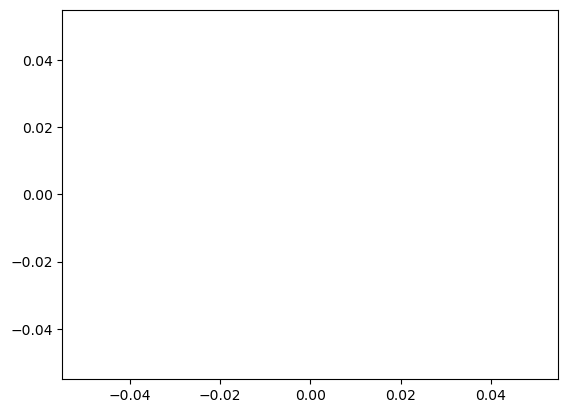

In [25]:

preds = []

plt.plot(loss_list)
plt.savefig('Image/loss_train.jpg')

for i in range(len(X_test)):
    preds.append(net(X_test[i].unsqueeze(0)).detach().numpy())
print('0'*100)
print(y_test.shape)

preds = torch.tensor(np.array(preds))
print(preds.shape)

print(F.l1_loss(torch.tensor(preds),y_test))

torch.save(net.state_dict(), 'model/model.pytorch')

In [26]:
print(data_x.shape)
net(data_x)


torch.Size([46, 3, 400, 400])


tensor([[ 41168.5938,  64925.9219,  78900.3438],
        [ 61112.8320,  93005.2656, 116369.4297],
        [ 22917.5352,  40922.2305,  46132.0391],
        [ 25545.8418,  45311.0273,  89303.2188],
        [ 42905.5586,  66447.5781,  69229.1797],
        [ 29239.3027,  65294.7344,  98995.7500],
        [ 40283.0508,  71217.7656, 124841.6719],
        [ 51486.4375,  84844.5703, 101462.0859],
        [ 39506.4531,  65255.5391,  85779.7188],
        [ 34785.7500,  49481.6445,  66065.9609],
        [ 25029.9531,  49924.7500,  91718.8125],
        [ 38059.7969,  54450.6484,  76087.7344],
        [ 25496.0117,  43265.3750,  83246.3828],
        [ 50217.7109,  54017.3867,  93680.5938],
        [ 36621.5117,  56493.6094,  92770.0312],
        [ 47162.7734,  63412.0430, 102056.0859],
        [ 31108.9531,  48461.1523,  74094.5234],
        [ 37508.5039,  52856.6484,  86436.5859],
        [ 38122.9023,  55625.2148,  82054.4453],
        [ 48628.9297,  69802.9766,  47245.0898],
        [ 34324.7422